In [7]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "mouse-reference-genome-read-counts"

In [1]:
suppressWarnings({ suppressMessages({
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("DEXSeq")

library("DEXSeq")
})})

In [2]:
suppressWarnings({ suppressMessages({
count_files <- c("/kaggle/input/mouse-reference-genome-read-counts/dexseq_counts_SRR19123213_1.txt",
                 "/kaggle/input/mouse-reference-genome-read-counts/dexseq_counts_SRR19123214_1.txt",
                "/kaggle/input/mouse-reference-genome-read-counts/dexseq_counts_SRR19123215_1.txt",
                "/kaggle/input/mouse-reference-genome-read-counts/dexseq_counts_SRR19123216_1.txt",
                "/kaggle/input/mouse-reference-genome-read-counts/dexseq_counts_SRR19123217_1.txt",
                "/kaggle/input/mouse-reference-genome-read-counts/dexseq_counts_SRR19123218_1.txt",
                "/kaggle/input/mouse-reference-genome-read-counts/dexseq_counts_SRR19123219_1.txt",
                "/kaggle/input/mouse-reference-genome-read-counts/dexseq_counts_SRR19123220_1.txt",
                "/kaggle/input/mouse-reference-genome-read-counts/dexseq_counts_SRR19123221_1.txt",
                "/kaggle/input/mouse-reference-genome-read-counts/dexseq_counts_SRR19123222_1.txt",
                "/kaggle/input/mouse-reference-genome-read-counts/dexseq_counts_SRR19123223_1.txt",
                "/kaggle/input/mouse-reference-genome-read-counts/dexseq_counts_SRR19123224_1.txt")

counts = list.files("/kaggle/input/mouse-reference-genome-read-counts", pattern=".txt$", full.names=TRUE)
annotation_file <- "/kaggle/input/mouse-reference-genome-read-counts/dexseq.annotation.gff"
})})

### Age as condition

In [10]:
# Sample data frame with age as condition
sample_data_age <- data.frame(
  row.names = c("SRR19123213", "SRR19123214", "SRR19123215", "SRR19123216", "SRR19123217", "SRR19123218", "SRR19123219", "SRR19123220", "SRR19123221", "SRR19123222", "SRR19123223", "SRR19123224"),
  condition = c("20months", "20months", "20months", "20months", "20months", "20months",
                "4months", "4months", "4months", "4months", "4months", "4months"),
  sex = c("Male", "Male", "Male", "Female", "Female", "Female",
          "Male", "Male", "Male", "Female", "Female", "Female"),
  stringsAsFactors = TRUE
)

In [11]:
sample_data_age

,condition,sex
,<fct>,<fct>
SRR19123213,20months,Male
SRR19123214,20months,Male
SRR19123215,20months,Male
SRR19123216,20months,Female
SRR19123217,20months,Female
SRR19123218,20months,Female
SRR19123219,4months,Male
SRR19123220,4months,Male
SRR19123221,4months,Male


In [12]:
suppressWarnings({ suppressMessages({
dxd_age <- DEXSeqDataSetFromHTSeq(count_files,
                              sample_data_age,
                              design = ~sample + exon + condition + condition:exon,
                              flattenedfile=annotation_file)
})})

In [13]:
dxd_age <- estimateSizeFactors(dxd_age)
dxd_age <- estimateDispersions(dxd_age)

In [14]:
dxd_age <- testForDEU(dxd_age)

dxd_age <- estimateExonFoldChanges(dxd_age, fitExpToVar="condition")
results_age <- DEXSeq(dxd_age)

Fit for gene/exon ENSMUSG00000074218.4 threw the next warning(s): Too much damping - convergence tolerance not achievable

Fit for gene/exon ENSMUSG00000074218.4 threw the next warning(s): Too much damping - convergence tolerance not achievable



In [15]:
head(results_age)


LRT p-value: full vs reduced

DataFrame with 6 rows and 16 columns
                                       groupID   featureID exonBaseMean
                                   <character> <character>    <numeric>
ENSMUSG00000000001.5:E001 ENSMUSG00000000001.5        E001     1562.845
ENSMUSG00000000001.5:E002 ENSMUSG00000000001.5        E002      282.580
ENSMUSG00000000001.5:E003 ENSMUSG00000000001.5        E003      216.765
ENSMUSG00000000001.5:E004 ENSMUSG00000000001.5        E004      203.348
ENSMUSG00000000001.5:E005 ENSMUSG00000000001.5        E005      183.888
ENSMUSG00000000001.5:E006 ENSMUSG00000000001.5        E006      227.077
                          dispersion       stat    pvalue      padj X20months
                           <numeric>  <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000000001.5:E001 0.00231690 0.78121562  0.376770  0.900460   47.7532
ENSMUSG00000000001.5:E002 0.00274407 0.31236491  0.576233  0.947336   24.7806
ENSMUSG00000000001.5:E003 0.00289293 0.13127

In [16]:
# Extract significant genes for each factor
significant_aging <- results_age[which(!is.na(results_age$padj) & results_age$padj < 0.05), ]

# Get the counts
n_significant_aging <- nrow(significant_aging)

# Print the results
cat("Number of significant genes for Aging effect:", n_significant_aging, "\n")

Number of significant genes for Aging effect: 146 


In [17]:
top_age <- head(significant_aging[order(significant_aging$padj), ], 5)
top_age


LRT p-value: full vs reduced

DataFrame with 5 rows and 16 columns
                                         groupID   featureID exonBaseMean
                                     <character> <character>    <numeric>
ENSMUSG00000005371.16:E027 ENSMUSG00000005371.16        E027      54.3254
ENSMUSG00000028796.18:E011 ENSMUSG00000028796.18        E011     235.7523
ENSMUSG00000005371.16:E026 ENSMUSG00000005371.16        E026      95.3709
ENSMUSG00000110279.2:E002   ENSMUSG00000110279.2        E002    8776.4410
ENSMUSG00000023353.15:E001 ENSMUSG00000023353.15        E001      74.5237
                           dispersion      stat      pvalue        padj
                            <numeric> <numeric>   <numeric>   <numeric>
ENSMUSG00000005371.16:E027 0.02625138   82.0253 1.34357e-19 2.86867e-14
ENSMUSG00000028796.18:E011 0.02052973   59.4182 1.27482e-14 1.36094e-09
ENSMUSG00000005371.16:E026 0.01946773   58.0124 2.60474e-14 1.39035e-09
ENSMUSG00000110279.2:E002  0.00347531   58.2268 2.3357

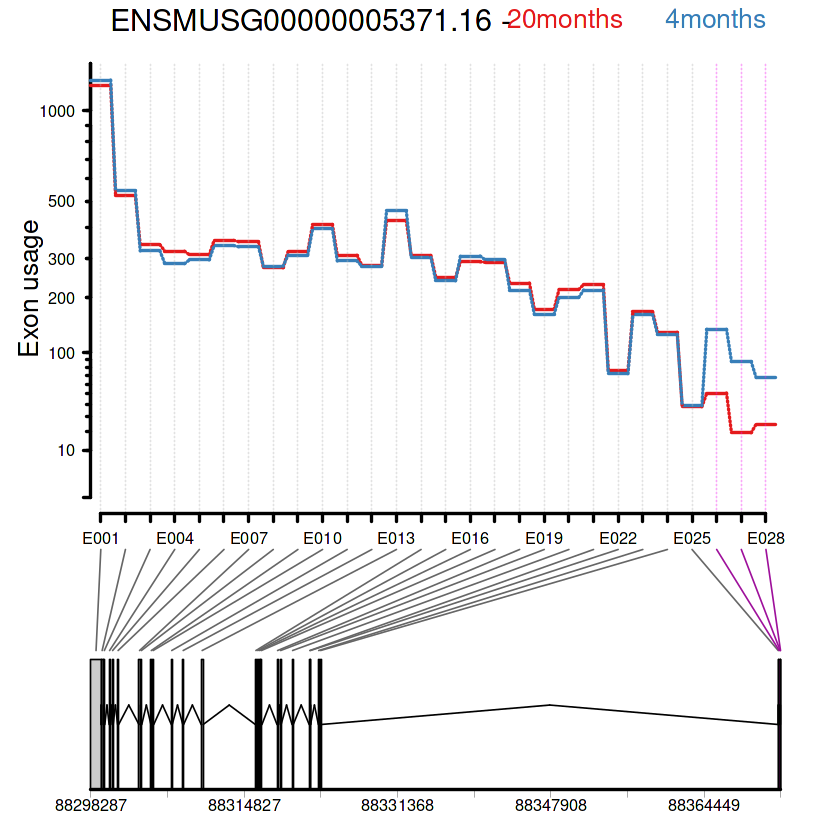

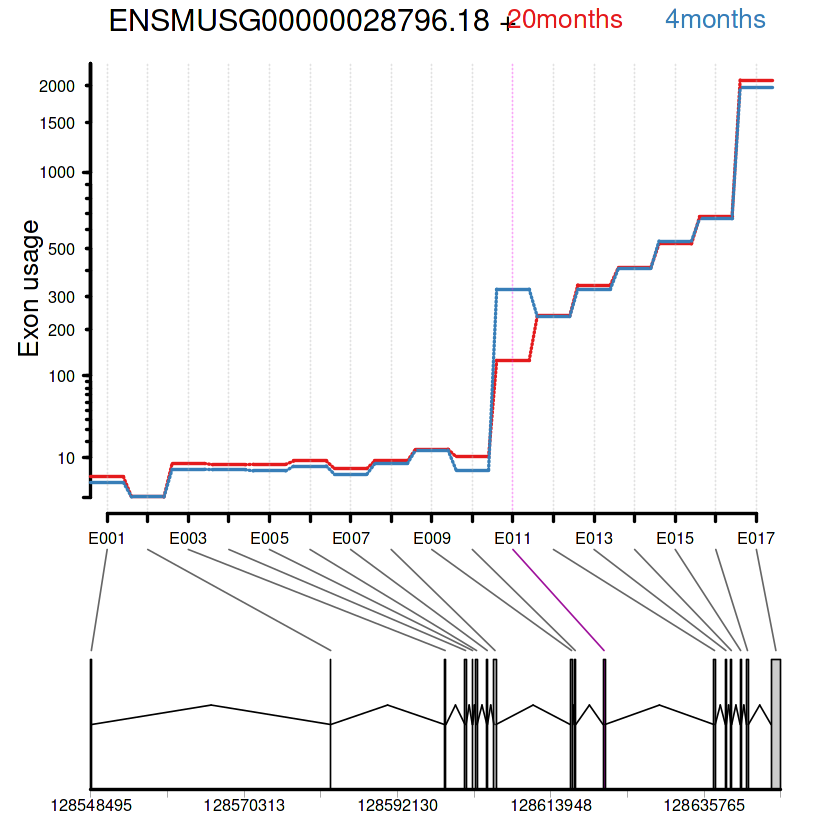

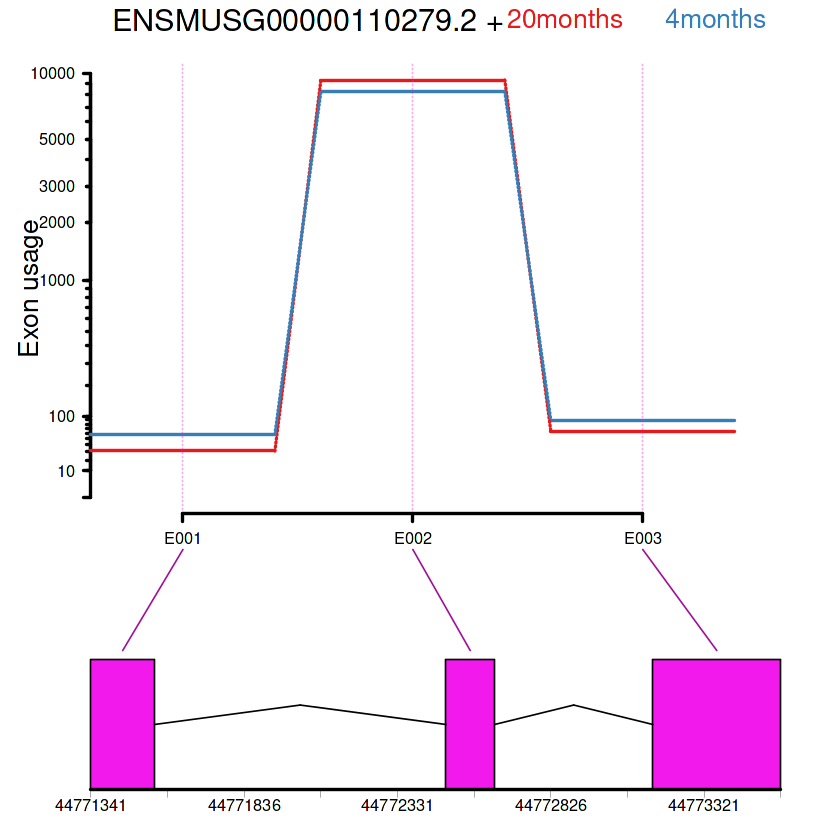

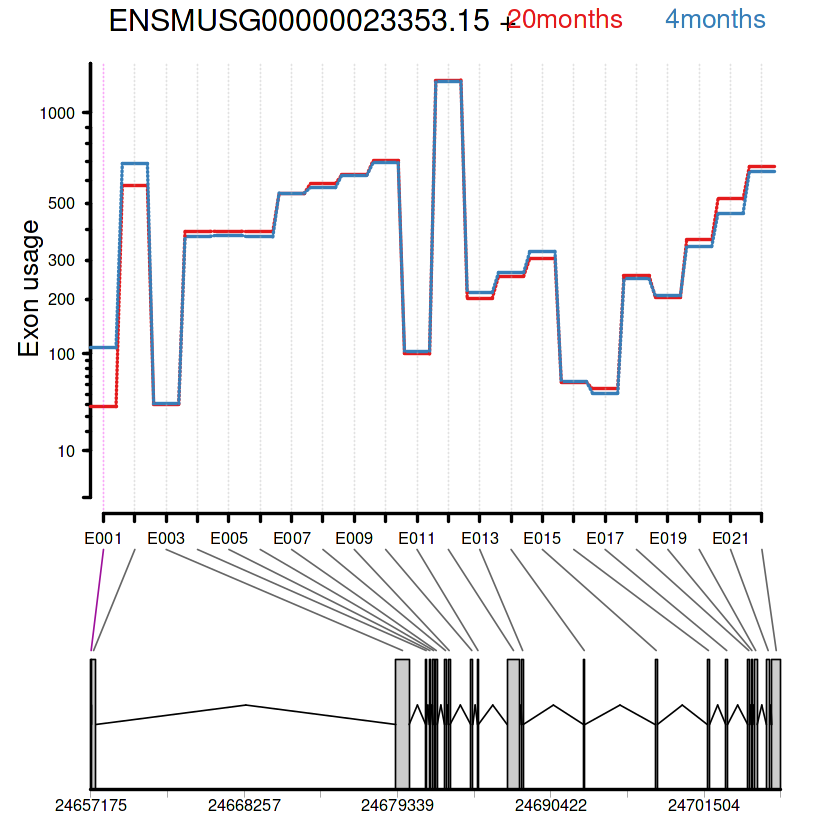

In [19]:
for (id in unique(top_age$groupID)){
    plotDEXSeq(results_age, id, legend=TRUE, expression=FALSE, splicing=TRUE, cex.axis=1.2, cex=1.3, lwd=2 )
}

In [35]:
top_age$transcripts

[[1]]
[1] "ENSMUST00000005504.15" "ENSMUST00000235112.2" 

[[2]]
[1] "ENSMUST00000106079.10"

[[3]]
[1] "ENSMUST00000005504.15"

[[4]]
[1] "ENSMUST00000209340.2"

[[5]]
[1] "ENSMUST00000024123.9"

### Sex as condition

In [3]:
# Sample data frame with age as condition
sample_data_sex <- data.frame(
  row.names = c("SRR19123213", "SRR19123214", "SRR19123215", "SRR19123216", "SRR19123217", "SRR19123218", "SRR19123219", "SRR19123220", "SRR19123221", "SRR19123222", "SRR19123223", "SRR19123224"),
  age = c("20months", "20months", "20months", "20months", "20months", "20months",
          "4months", "4months", "4months", "4months", "4months", "4months"),
  condition = c("Male", "Male", "Male", "Female", "Female", "Female",
                "Male", "Male", "Male", "Female", "Female", "Female"),
  stringsAsFactors = TRUE
)

In [4]:
sample_data_sex

,age,condition
,<fct>,<fct>
SRR19123213,20months,Male
SRR19123214,20months,Male
SRR19123215,20months,Male
SRR19123216,20months,Female
SRR19123217,20months,Female
SRR19123218,20months,Female
SRR19123219,4months,Male
SRR19123220,4months,Male
SRR19123221,4months,Male


In [5]:
suppressWarnings({ suppressMessages({
dxd_sex <- DEXSeqDataSetFromHTSeq(count_files,
                              sample_data_sex,
                              design = ~sample + exon + condition + condition:exon,
                              flattenedfile=annotation_file)
})})

In [6]:
dxd_sex <- estimateSizeFactors(dxd_sex)
dxd_sex <- estimateDispersions(dxd_sex)
dxd_sex <- testForDEU(dxd_sex)
dxd_sex <- estimateExonFoldChanges(dxd_sex, fitExpToVar="condition")
results_sex <- DEXSeq(dxd_sex)

In [7]:
head(results_sex)


LRT p-value: full vs reduced

DataFrame with 6 rows and 16 columns
                                       groupID   featureID exonBaseMean
                                   <character> <character>    <numeric>
ENSMUSG00000000001.5:E001 ENSMUSG00000000001.5        E001     1562.845
ENSMUSG00000000001.5:E002 ENSMUSG00000000001.5        E002      282.580
ENSMUSG00000000001.5:E003 ENSMUSG00000000001.5        E003      216.765
ENSMUSG00000000001.5:E004 ENSMUSG00000000001.5        E004      203.348
ENSMUSG00000000001.5:E005 ENSMUSG00000000001.5        E005      183.888
ENSMUSG00000000001.5:E006 ENSMUSG00000000001.5        E006      227.077
                          dispersion      stat    pvalue      padj    Female
                           <numeric> <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000000001.5:E001 0.00254649 0.0439055 0.8340295  1.000000   47.1472
ENSMUSG00000000001.5:E002 0.00161592 6.0954100 0.0135533  0.979574   24.9651
ENSMUSG00000000001.5:E003 0.00279172 0.4157389 0

In [8]:
# Extract significant genes for each factor
significant_sex <- results_sex[which(!is.na(results_sex$padj) & results_sex$padj < 0.05), ]

# Get the counts
n_significant_sex <- nrow(significant_sex)

# Print the results
cat("Number of significant genes for Sex effect:", n_significant_sex, "\n")

Number of significant genes for Sex effect: 38 


In [9]:
top_sex <- head(significant_sex[order(significant_sex$padj), ], 5)
top_sex


LRT p-value: full vs reduced

DataFrame with 5 rows and 16 columns
                                                                                   groupID
                                                                               <character>
ENSMUSG00000098078.2+ENSMUSG00000031329.5+ENSMUSG00000085715.3:E016 ENSMUSG00000098078.2..
ENSMUSG00002075825.1+ENSMUSG00002076282.1+ENSMUSG00000086503.5:E003 ENSMUSG00002075825.1..
ENSMUSG00000098078.2+ENSMUSG00000031329.5+ENSMUSG00000085715.3:E015 ENSMUSG00000098078.2..
ENSMUSG00002075825.1+ENSMUSG00002076282.1+ENSMUSG00000086503.5:E011 ENSMUSG00002075825.1..
ENSMUSG00000035183.15:E009                                           ENSMUSG00000035183.15
                                                                      featureID
                                                                    <character>
ENSMUSG00000098078.2+ENSMUSG00000031329.5+ENSMUSG00000085715.3:E016        E016
ENSMUSG00002075825.1+ENSMUSG00002076282.1+ENSMUSG000000

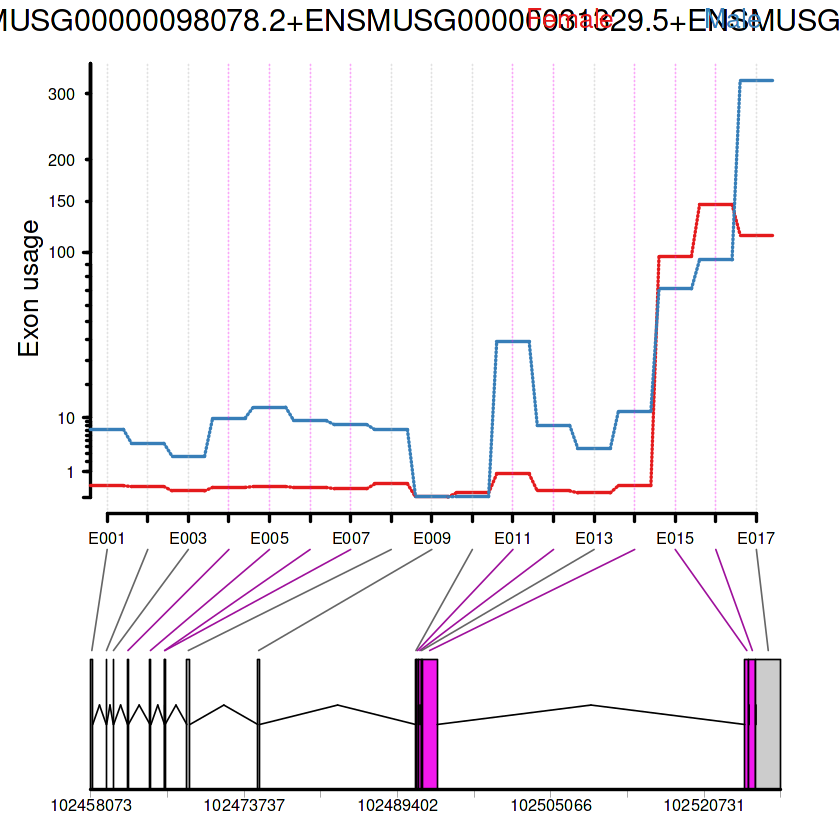

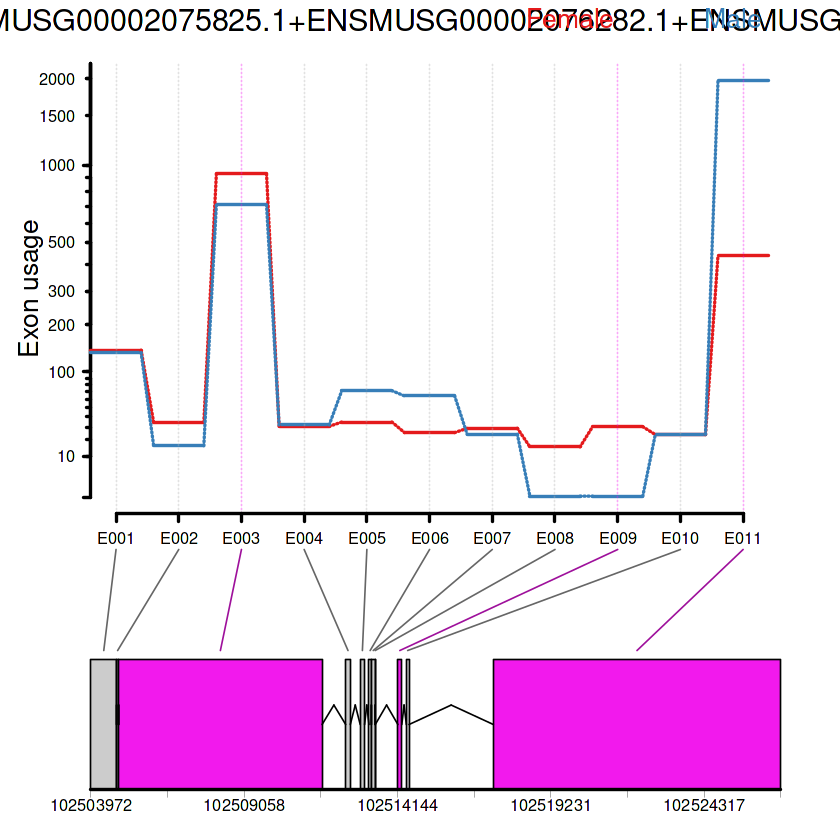

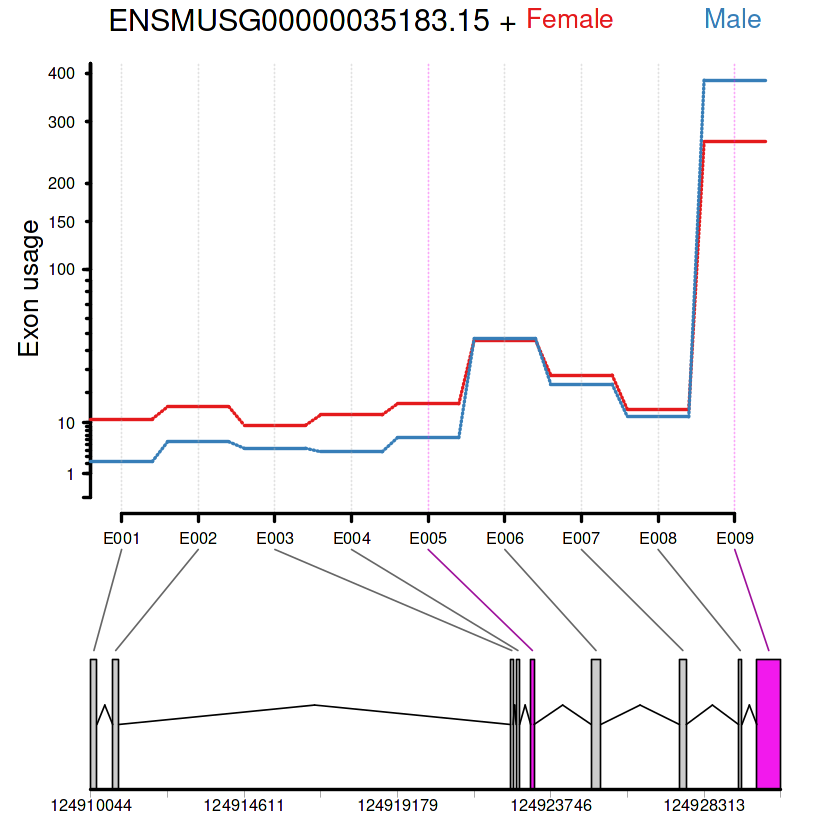

In [10]:
for (id in unique(top_sex$groupID)){
    plotDEXSeq(results_sex, id, legend=TRUE, expression=FALSE, splicing=TRUE, cex.axis=1.2, cex=1.3, lwd=2 )
}

In [11]:
top_sex$transcripts

[[1]]
[1] "ENSMUST00000211291.2" "ENSMUST00000152916.2"

[[2]]
[1] "ENSMUST00000127786.4"

[[3]]
[1] "ENSMUST00000211291.2" "ENSMUST00000152916.2" "ENSMUST00000182089.2"

[[4]]
[1] "ENSMUST00000127786.4"

[[5]]
[1] "ENSMUST00000070353.4"

### Age:Sex Interaction as condition

In [12]:
# Condition based on age:sex interaction
sample_data_interaction <- data.frame(
  row.names = c("SRR19123213", "SRR19123214", "SRR19123215", "SRR19123216", "SRR19123217", "SRR19123218", "SRR19123219", "SRR19123220", "SRR19123221", "SRR19123222", "SRR19123223", "SRR19123224"),
  condition = c("20months.Male", "20months.Male", "20months.Male", 
                "20months.Female", "20months.Female", "20months.Female",
                "4months.Male", "4months.Male", "4months.Male", 
                "4months.Female", "4months.Female", "4months.Female"),
  stringsAsFactors = TRUE
)

In [13]:
sample_data_interaction

,condition
,<fct>
SRR19123213,20months.Male
SRR19123214,20months.Male
SRR19123215,20months.Male
SRR19123216,20months.Female
SRR19123217,20months.Female
SRR19123218,20months.Female
SRR19123219,4months.Male
SRR19123220,4months.Male
SRR19123221,4months.Male


In [14]:
suppressWarnings({ suppressMessages({
dxd_interaction <- DEXSeqDataSetFromHTSeq(count_files,
                              sample_data_interaction,
                              design = ~sample + exon + condition + condition:exon,
                              flattenedfile=annotation_file)
})})

In [15]:
dxd_interaction <- estimateSizeFactors(dxd_interaction)
dxd_interaction <- estimateDispersions(dxd_interaction)
dxd_interaction <- testForDEU(dxd_interaction)
dxd_interaction <- estimateExonFoldChanges(dxd_interaction, fitExpToVar="condition")
results_interaction <- DEXSeq(dxd_interaction)

In [16]:
head(results_interaction)


LRT p-value: full vs reduced

DataFrame with 6 rows and 24 columns
                                       groupID   featureID exonBaseMean
                                   <character> <character>    <numeric>
ENSMUSG00000000001.5:E001 ENSMUSG00000000001.5        E001     1562.845
ENSMUSG00000000001.5:E002 ENSMUSG00000000001.5        E002      282.580
ENSMUSG00000000001.5:E003 ENSMUSG00000000001.5        E003      216.765
ENSMUSG00000000001.5:E004 ENSMUSG00000000001.5        E004      203.348
ENSMUSG00000000001.5:E005 ENSMUSG00000000001.5        E005      183.888
ENSMUSG00000000001.5:E006 ENSMUSG00000000001.5        E006      227.077
                          dispersion      stat    pvalue      padj
                           <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000000001.5:E001 0.00223324  2.539362 0.4682194  0.842443
ENSMUSG00000000001.5:E002 0.00164996  6.507524 0.0893663  0.455196
ENSMUSG00000000001.5:E003 0.00212186  4.053119 0.2557850  0.690389
ENSMUSG00000000001.5:

In [17]:
# Extract significant genes for each factor
significant_interaction <- results_interaction[which(!is.na(results_interaction$padj) & results_interaction$padj < 0.05), ]

# Get the counts
n_significant_interaction <- nrow(significant_interaction)

# Print the results
cat("Number of significant genes for Age:Sex interaction effect:", n_significant_interaction, "\n")

Number of significant genes for Age:Sex interaction effect: 4228 


In [18]:
top_interaction <- head(significant_interaction[order(significant_interaction$padj), ], 5)
top_interaction


LRT p-value: full vs reduced

DataFrame with 5 rows and 24 columns
                                                                                   groupID
                                                                               <character>
ENSMUSG00002075825.1+ENSMUSG00002076282.1+ENSMUSG00000086503.5:E003 ENSMUSG00002075825.1..
ENSMUSG00000098078.2+ENSMUSG00000031329.5+ENSMUSG00000085715.3:E016 ENSMUSG00000098078.2..
ENSMUSG00000005371.16:E027                                           ENSMUSG00000005371.16
ENSMUSG00000059149.18:E007                                           ENSMUSG00000059149.18
ENSMUSG00000031765.9:E002                                             ENSMUSG00000031765.9
                                                                      featureID
                                                                    <character>
ENSMUSG00002075825.1+ENSMUSG00002076282.1+ENSMUSG00000086503.5:E003        E003
ENSMUSG00000098078.2+ENSMUSG00000031329.5+ENSMUSG000000

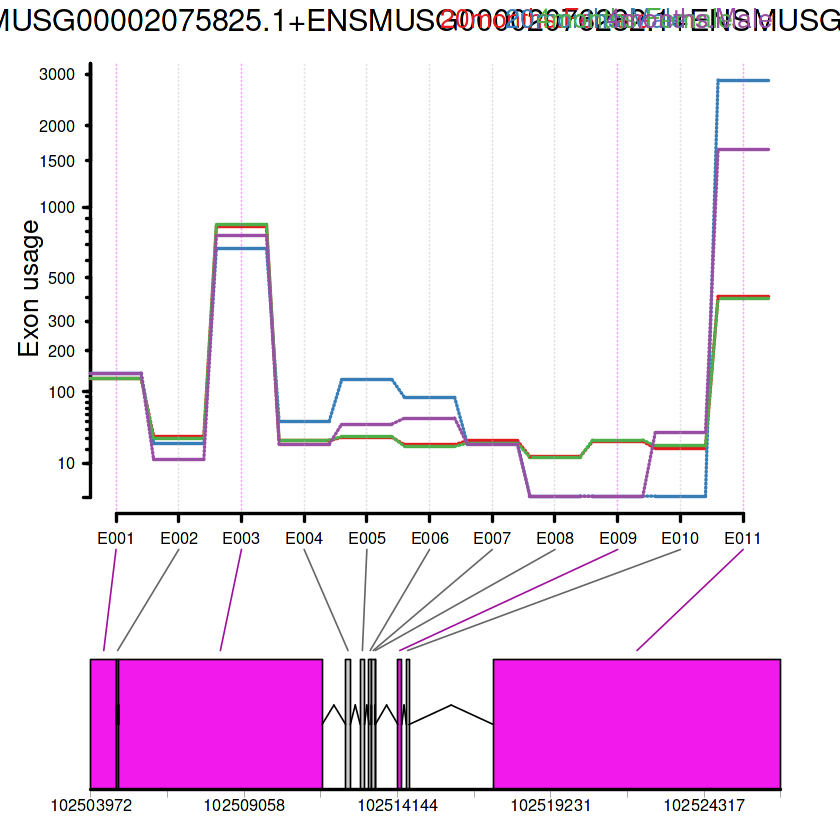

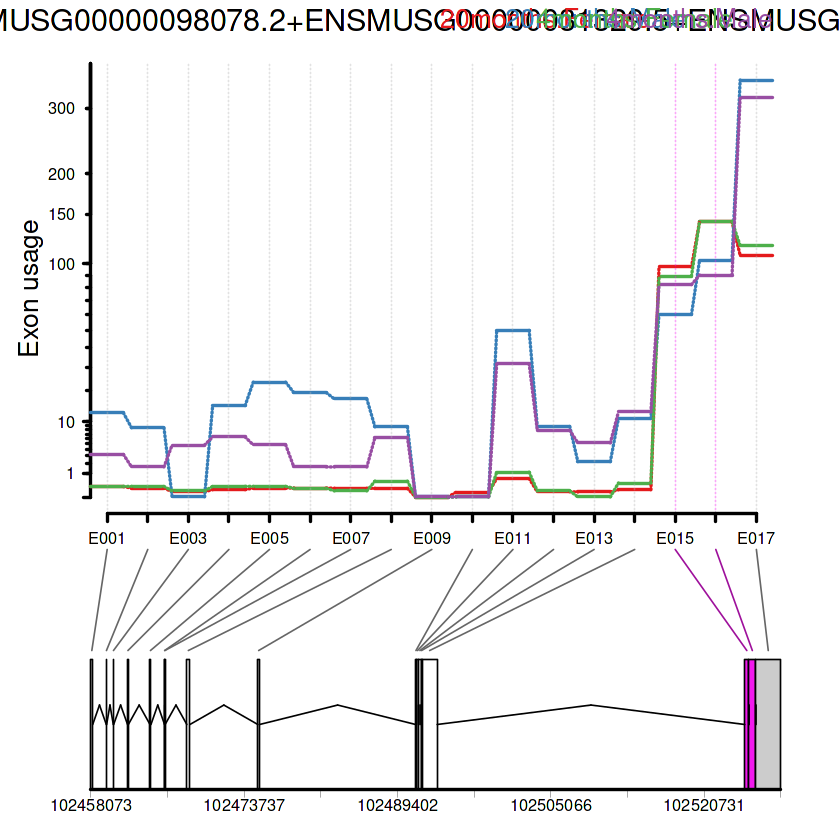

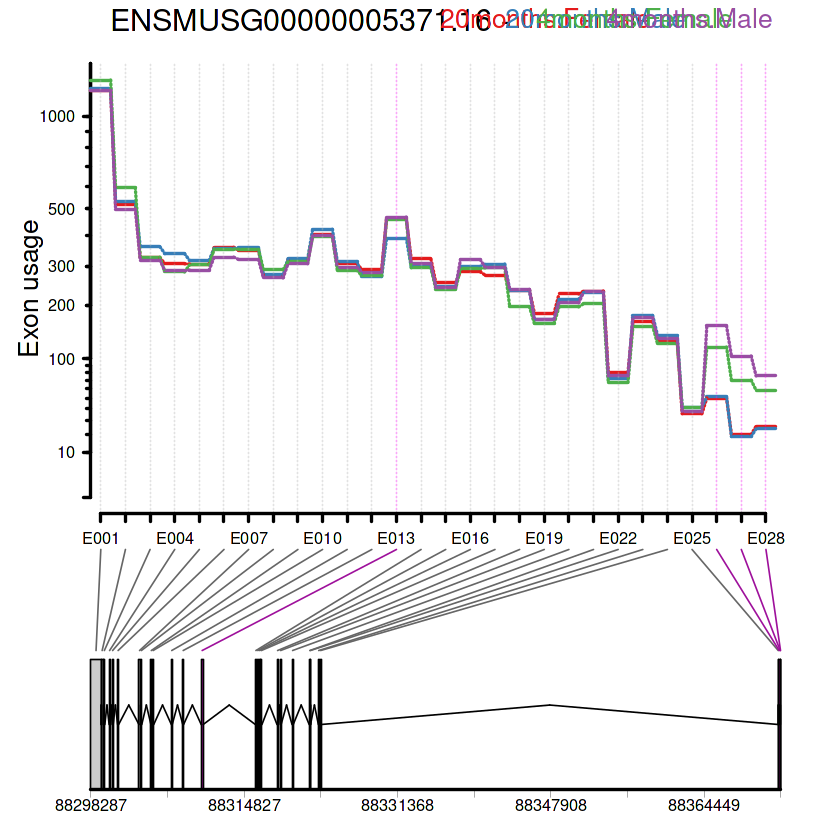

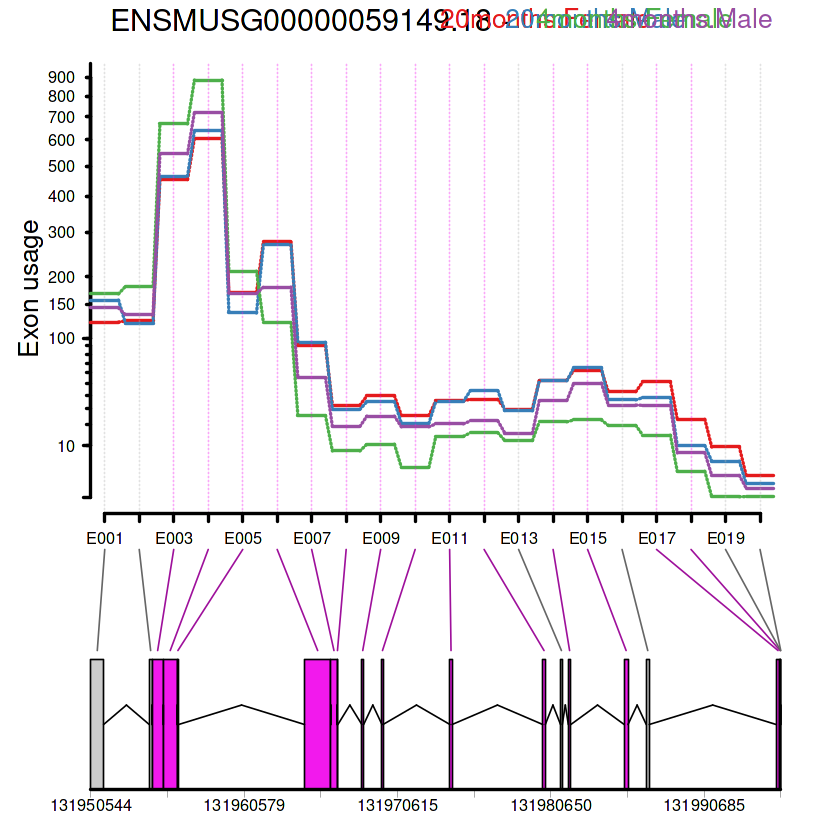

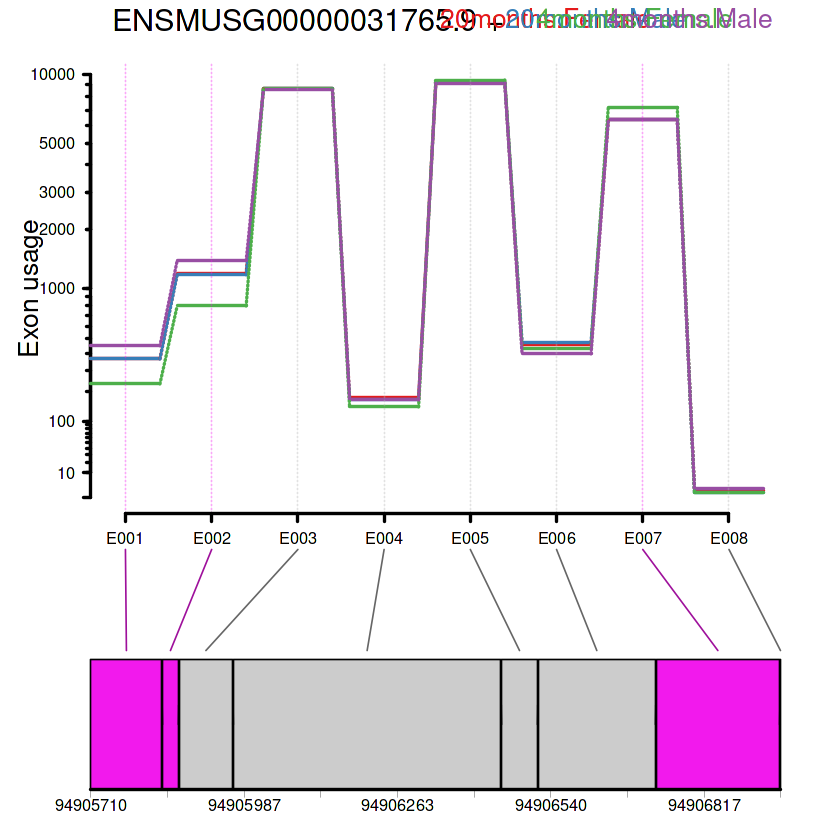

In [19]:
for (id in unique(top_interaction$groupID)){
    plotDEXSeq(results_interaction, id, legend=TRUE, expression=FALSE, splicing=TRUE, cex.axis=1.2, cex=1.3, lwd=2 )
}

In [21]:
top_interaction$transcripts

[[1]]
[1] "ENSMUST00000127786.4"

[[2]]
[1] "ENSMUST00000211291.2" "ENSMUST00000152916.2"

[[3]]
[1] "ENSMUST00000005504.15" "ENSMUST00000235112.2" 

[[4]]
[1] "ENSMUST00000159038.8"  "ENSMUST00000046658.10"

[[5]]
[1] "ENSMUST00000034215.8" "ENSMUST00000212291.2"